### **Import libraries** 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [2]:
Bank_additional_full= pd.read_csv("C:/Users/LENOVO/Desktop/Refka/bank-additional/bank-additional-full.csv", delimiter=';')

# Exploratory Data Analysis

In [3]:
Bank_additional_full

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
Bank_additional_full.shape

(41188, 21)

In [5]:
Bank_additional_full.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [6]:
Bank_additional_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
Bank_additional_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
Bank_additional_full.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


**Let's verify missing values**

In [9]:
Bank_additional_full.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

**Duplication** **handling** 

In [10]:
Bank_additional_full_dup = Bank_additional_full[Bank_additional_full.duplicated(keep="last")]
Bank_additional_full_dup

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20072,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20531,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25183,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28476,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32505,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [11]:
Bank_additional_full_dup.shape

(12, 21)

In [12]:
Bank_additional_full.drop_duplicates(inplace = True)
Bank_additional_full.shape

(41176, 21)

**Features correlation**

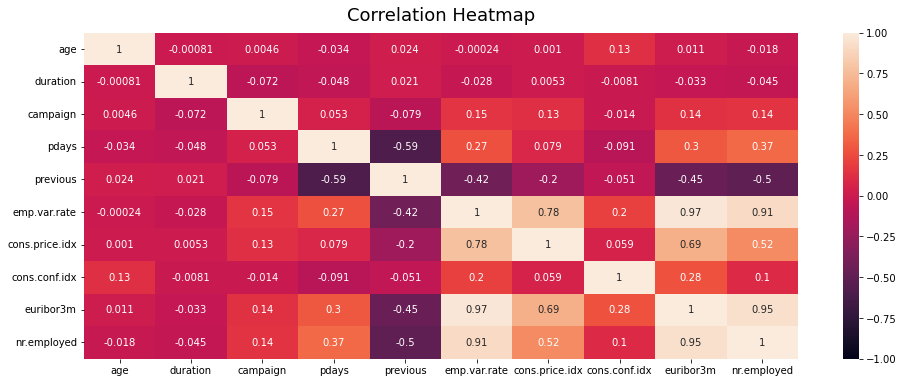

In [13]:
 #Plot features correlation
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(Bank_additional_full.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [14]:
#Drop duration features
Bank_additional_full=Bank_additional_full.drop(['duration'],axis=1)

**categorical_features analysis**

In [15]:
category_cols = list(Bank_additional_full.select_dtypes(include=['object']))
category_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\ana

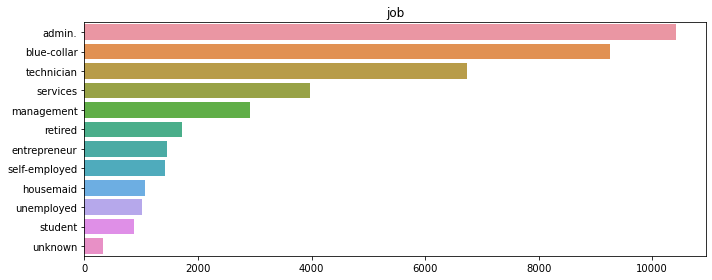

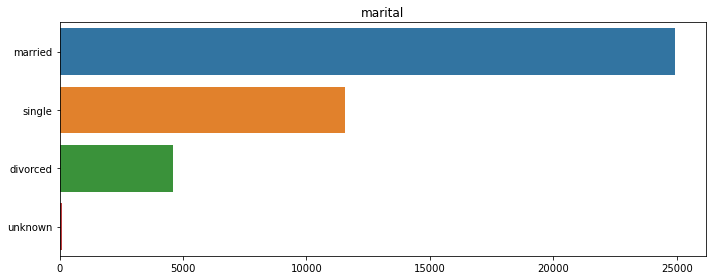

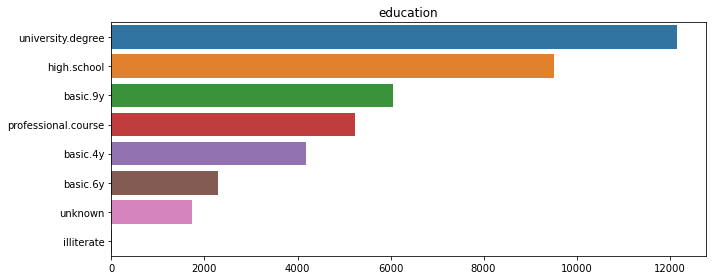

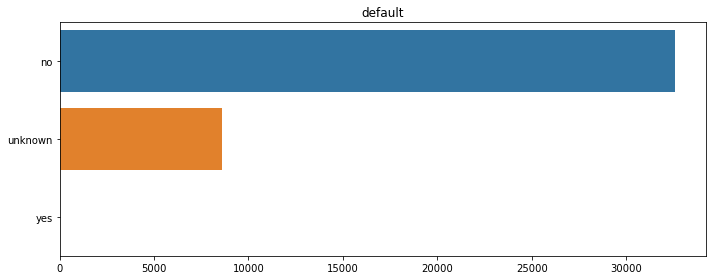

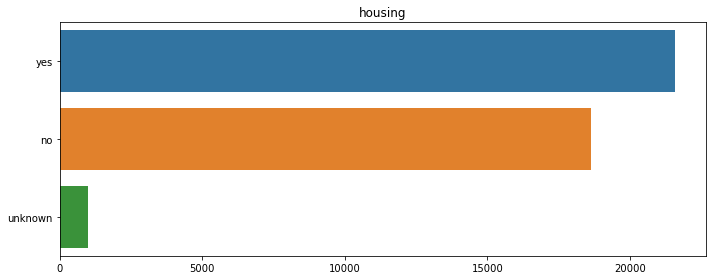

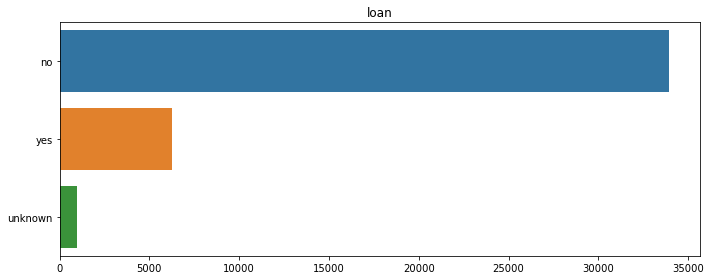

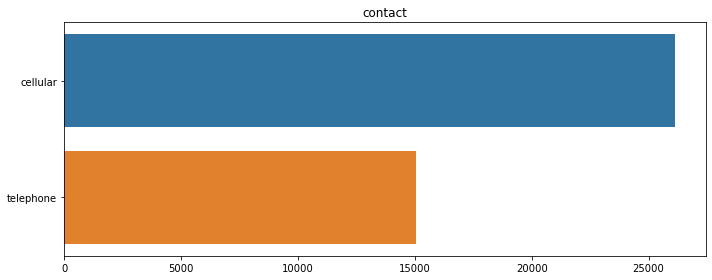

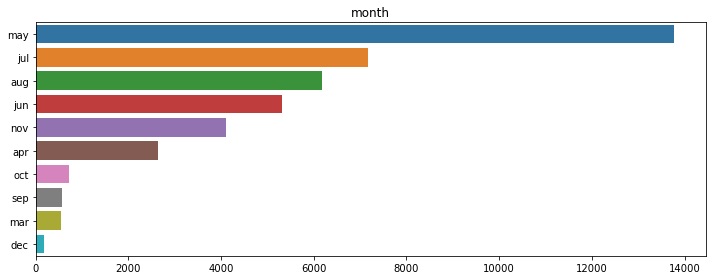

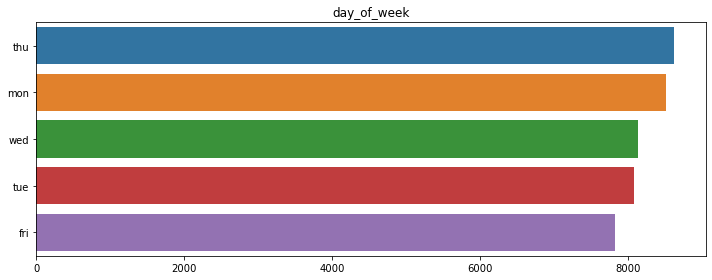

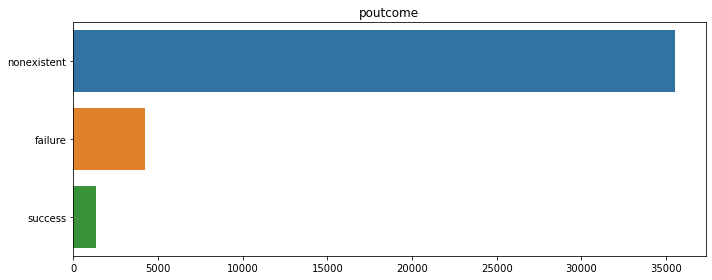

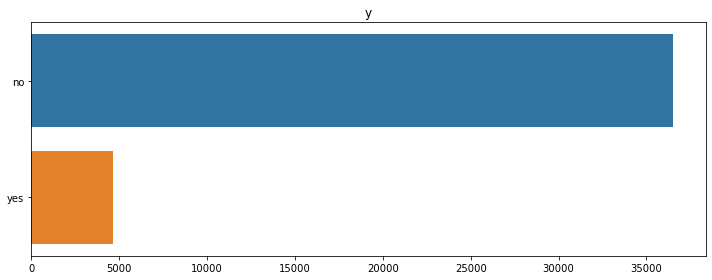

In [16]:
for col in category_cols:
    plt.figure(figsize=(10,4))
    sns.barplot(Bank_additional_full[col].value_counts().values, Bank_additional_full[col].value_counts().index,orient ='h')
    plt.title(col)
    plt.tight_layout()

In [17]:
Bank_additional_full

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [18]:
Bank_additional_full['target'] = Bank_additional_full.apply(lambda row: 1 if row["y"] == "yes" else 0, axis=1)
Bank_additional_full.drop(["y"],axis=1,inplace=True)

Text(0, 0.5, 'Absolute frequency')

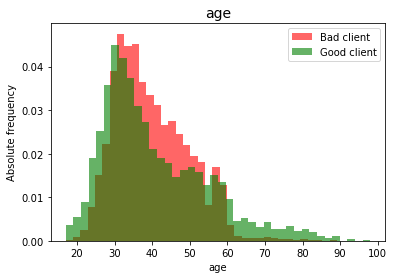

In [19]:
#Plot distribution of age per target
Unsubscribed_job = Bank_additional_full[Bank_additional_full.target == 0].iloc[:,:1]
Subscribed_job= Bank_additional_full[Bank_additional_full.target == 1].iloc[:,:1]
data1 = np.array(Unsubscribed_job)
data2 = np.array(Subscribed_job)
np.warnings.filterwarnings('ignore')
plt.hist(data1, bins=40, density=True, color="r", alpha = 0.6, label='Bad client')
plt.hist(data2, bins=40, density=True, color="g", alpha = 0.6, label='Good client')
plt.legend(loc='upper right')
plt.title('age', fontsize=14)
plt.xlabel('age')
plt.ylabel('Absolute frequency')

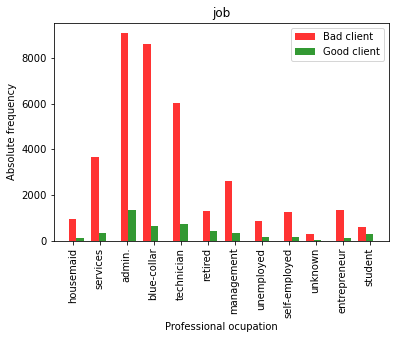

In [20]:
Unsubscribed_job= Bank_additional_full[Bank_additional_full.target == 0].iloc[:,1:2]
subscribed_job= Bank_additional_full[Bank_additional_full.target == 1].iloc[:,1:2]
data1 = np.array(Unsubscribed_job)
data2 = np.array(subscribed_job)
np.warnings.filterwarnings('ignore')
plt.hist(data1, bins=40, color="r", alpha = 0.8, label='Bad client', align="left")
plt.hist(data2, bins=40, color="g", alpha = 0.8, label='Good client', align="right")
plt.legend(loc='upper right')
plt.title('job', fontsize=12)
plt.xlabel('Professional ocupation')
plt.xticks(rotation='vertical')
plt.ylabel('Absolute frequency');

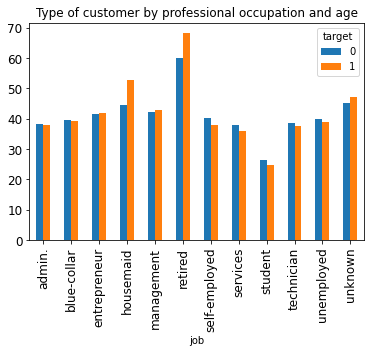

In [21]:
Type_customer= Bank_additional_full.pivot_table(
    columns="target",
    index="job",
    values="age", aggfunc=np.mean)
Type_customer.sort_values(by=["job"], ascending=True).plot(kind="bar", title=("Type of customer by professional occupation and age"), figsize=(6,4), fontsize = 12);

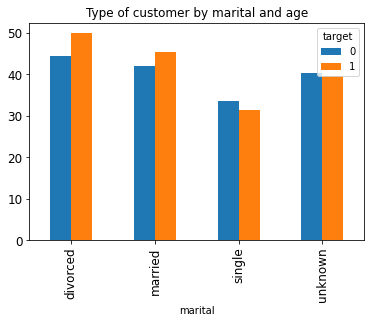

In [22]:
Type_customer= Bank_additional_full.pivot_table(
    columns="target",
    index="marital",
    values="age", aggfunc=np.mean)
Type_customer.sort_values(by=["marital"], ascending=True).plot(kind="bar", title=("Type of customer by marital and age"), figsize=(6,4), fontsize = 12);

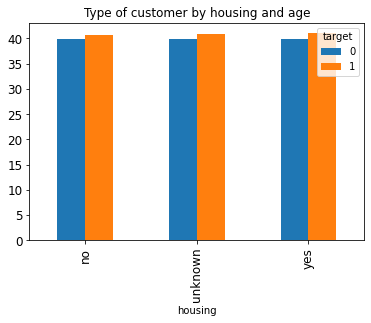

In [23]:
Type_customer= Bank_additional_full.pivot_table(
    columns="target",
    index="housing",
    values="age", aggfunc=np.mean)
Type_customer.sort_values(by=["housing"], ascending=True).plot(kind="bar", title=("Type of customer by housing and age"), figsize=(6,4), fontsize = 12);

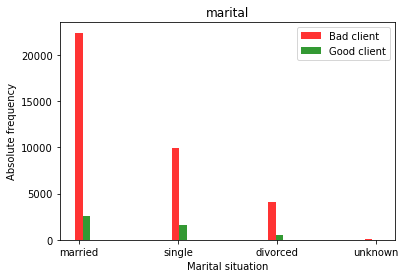

In [24]:
# Graph 'marital' vs. 'target'
Unsubscribed_marital = Bank_additional_full[Bank_additional_full.target == 0].iloc[:,2:3]
subscribed_marital = Bank_additional_full[Bank_additional_full.target == 1].iloc[:,2:3]

data1 = np.array(Unsubscribed_marital)
data2 = np.array(subscribed_marital)

np.warnings.filterwarnings('ignore')

plt.hist(data1, bins=40, color="r", alpha = 0.8, label='Bad client', align="left")
plt.hist(data2, bins=40, color="g", alpha = 0.8, label='Good client', align="right")
plt.legend(loc='upper right')
plt.title('marital', fontsize=12)
plt.xlabel('Marital situation')
plt.xticks(rotation='horizontal')
plt.ylabel('Absolute frequency')
plt.show()

[0] Clients not subscribedto  the term deposit: 36537
[1] Clients subscribed to the term deposit: 4639


,clients,%
0,36537,88.73
1,4639,11.27


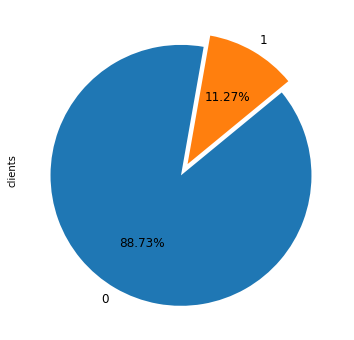

In [25]:
#Verify balencement of dataset
target_to_clients= Bank_additional_full.target.value_counts().to_frame().rename(columns={"target":"clients"})
calcul_percent = (Bank_additional_full.target.value_counts(normalize=True) *100).to_frame().rename(columns={"target":"%"})
Bank_additional_full_balenced = pd.concat([target_to_clients,calcul_percent],axis=1).round(decimals=2)

print(f"[0] Clients not subscribedto  the term deposit: {Bank_additional_full.target.value_counts()[0]}")
print(f"[1] Clients subscribed to the term deposit: {Bank_additional_full.target.value_counts()[1]}")

display(Bank_additional_full_balenced)
target_to_clients.plot(kind='pie', subplots=True, autopct='%1.2f%%', 
             explode= (0.05, 0.05), startangle=80, 
             legend=False, fontsize=12, figsize=(14,6));

**Numerical attributes analysis**

In [26]:
#nmerical attributes analysis
numeric_data = Bank_additional_full.select_dtypes(include=np.number) 
numeric_col = numeric_data.columns 

In [27]:
numeric_col

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'target'],
      dtype='object')

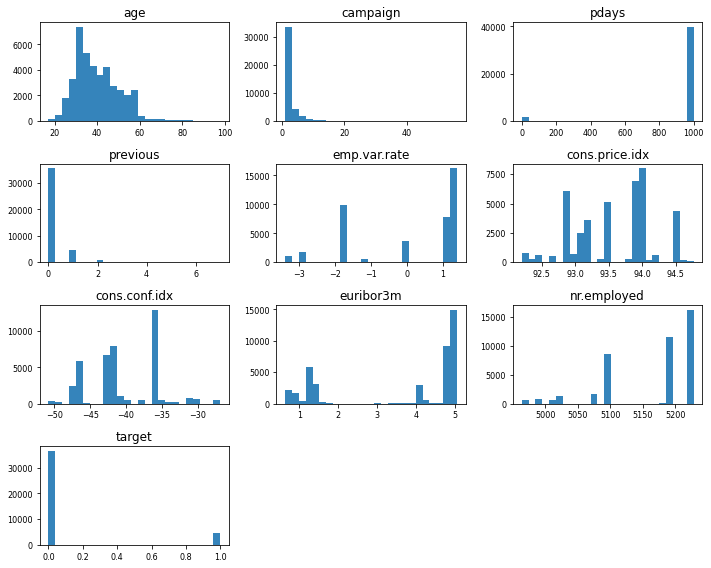

In [28]:
#Let's plot Histogram and verify distribution
Bank_additional_full[numeric_col].hist(figsize=(10,8), bins=25, xlabelsize=8, ylabelsize=8, alpha=0.9, grid=False)
plt.tight_layout();

**Detect Outlier**

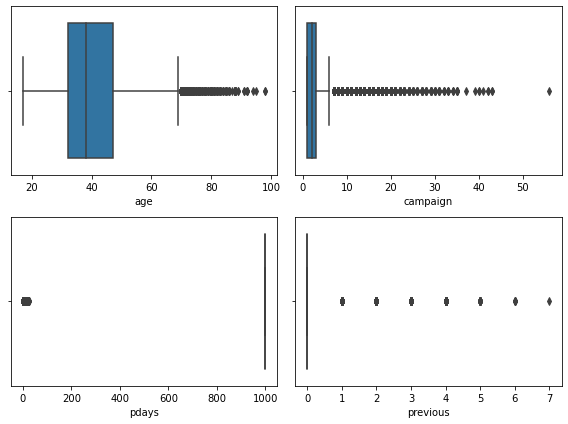

In [29]:
fig, axes = plt.subplots(2,2, figsize = (8,6), sharey = True)

for col, ax in zip(['age','campaign', 'pdays', 'previous'], 
                   axes.flatten()):
    
    sns.boxplot(x = col, data = numeric_data, ax = ax, orient ='h')
    plt.tight_layout();

In [30]:
Bank_additional_full['age'].describe()

count    41176.00000
mean        40.02380
std         10.42068
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [31]:
Bank_additional_full['age'].mean()

40.02380027200311

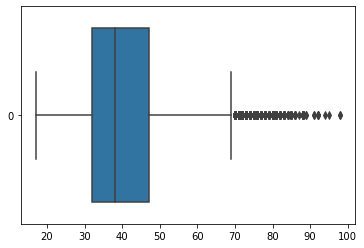

In [32]:
sns.boxplot(data = Bank_additional_full.age, orient ='h')
plt.show()

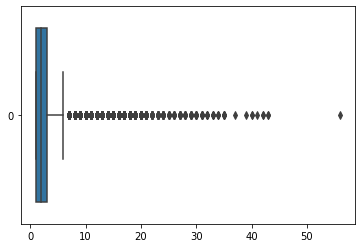

In [33]:
sns.boxplot(data = Bank_additional_full.campaign, orient ='h')
plt.show()

In [34]:
my_list = ['age','campaign','y']

In [35]:
sns.set(style ='ticks')
sns.pairplot(data = Bank_additional_full[my_list], hue = 'y')
plt.show()

KeyError: "['y'] not in index"

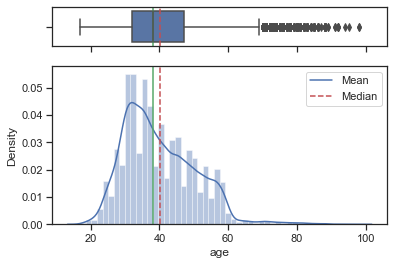

In [36]:
AGE = Bank_additional_full.age
np.array(AGE).mean()
np.median(AGE)


f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 2)})
mean=np.array(AGE).mean()
median=np.median(AGE)

sns.boxplot(AGE, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
sns.distplot(AGE, ax=ax_hist)

ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
plt.legend({'Mean':mean,'Median':median})
ax_box.set(xlabel='')

plt.show()

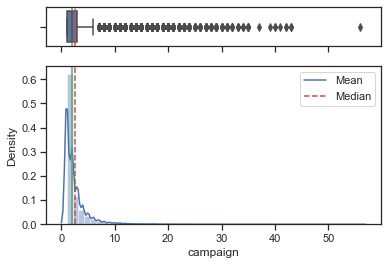

In [37]:
Campaign =Bank_additional_full.campaign
np.array(Campaign).mean()
np.median(Campaign)


f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 2)})
mean=np.array(Campaign).mean()
median=np.median(Campaign)

sns.boxplot(Campaign, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
sns.distplot(Campaign, ax=ax_hist)

ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
plt.legend({'Mean':mean,'Median':median})
ax_box.set(xlabel='')

plt.show()

**Check correlation of a specific numeric variable witch can have economic effect on target variable**

In [38]:
# **Let's check correlation of a specific numeric variable witch can have economic effect on target variable**
Economic_var = ["cons.price.idx", "cons.conf.idx", "euribor3m", "emp.var.rate", "target"]
Bank_additional_full[Economic_var].corr()

,cons.price.idx,cons.conf.idx,euribor3m,emp.var.rate,target
cons.price.idx,1.000000,0.059170,0.688180,0.775293,-0.136134
cons.conf.idx,0.059170,1.000000,0.277864,0.196257,0.054802
euribor3m,0.688180,0.277864,1.000000,0.972244,-0.307740
emp.var.rate,0.775293,0.196257,0.972244,1.000000,-0.298289
target,-0.136134,0.054802,-0.307740,-0.298289,1.000000


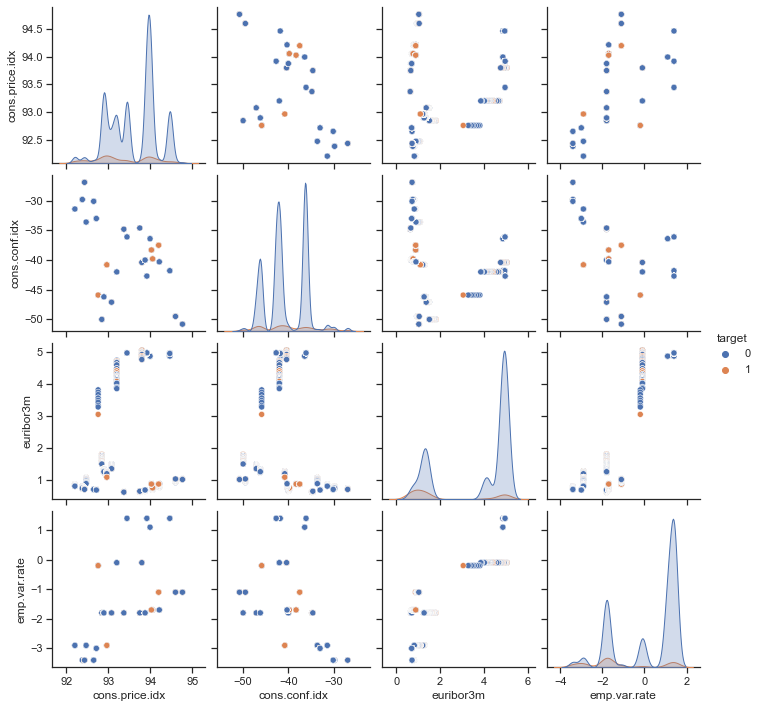

In [39]:
sns.pairplot(Bank_additional_full[Economic_var], hue="target")
plt.show()

In [40]:
Bank_additional_full['range_age'] = pd.cut(Bank_additional_full['age'], bins = [Bank_additional_full['age'].min(), 30, 60, Bank_additional_full['age'].max()],labels=['Young', 'Adult', 'Senior'])

In [42]:
Rang_age_target = Bank_additional_full.groupby(['range_age'])['target'].mean().multiply(100)

range_age
Young     15.211497
Adult      9.429544
Senior    45.544554
Name: target, dtype: float64

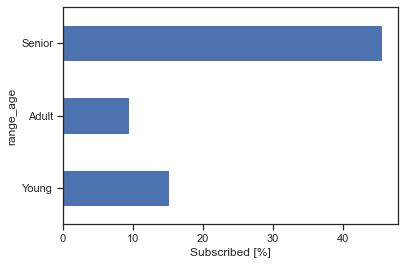

In [43]:
display(Rang_age_target)
Rang_age_target.plot.barh()

plt.xlabel('Subscribed [%]');

**Percentile method to drop outlier**

In [44]:
max_thresold = Bank_additional_full['age'].quantile(0.95)
max_thresold

58.0

In [45]:
Bank_additional_full[Bank_additional_full['age']>max_thresold]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target,range_age
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Adult
26,59,technician,married,unknown,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Adult
31,59,technician,married,unknown,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Adult
52,60,admin.,married,high.school,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Adult
92,60,admin.,married,unknown,unknown,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,1,Senior
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,1,Senior
41179,64,retired,divorced,professional.course,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,Senior
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,Senior


In [46]:
min_thresold = Bank_additional_full['age'].quantile(0.05)
min_thresold

26.0

In [47]:
Bank_additional_full
Bank_additional_full[Bank_additional_full['age']<min_thresold]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target,range_age
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Young
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Young
11,25,services,single,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Young
59,25,technician,single,university.degree,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Young
160,24,management,single,university.degree,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41084,18,student,single,unknown,no,yes,no,cellular,nov,tue,...,999,3,failure,-1.1,94.767,-50.8,1.049,4963.6,0,Young
41088,18,student,single,basic.4y,no,yes,no,telephone,nov,tue,...,13,2,success,-1.1,94.767,-50.8,1.049,4963.6,1,Young
41094,19,student,single,basic.9y,no,yes,no,cellular,nov,wed,...,999,1,failure,-1.1,94.767,-50.8,1.048,4963.6,0,Young
41134,25,student,single,high.school,no,no,no,cellular,nov,thu,...,999,0,nonexistent,-1.1,94.767,-50.8,1.041,4963.6,1,Young


In [48]:
df1 = Bank_additional_full[(Bank_additional_full['age']<max_thresold) & (Bank_additional_full['age']>min_thresold)]

In [49]:
df1.shape

(36582, 21)